In [108]:
##Importação das principais bibliotecas que utilizaremos neste estudo


import pandas_profiling 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.ensemble import RandomForestClassifier 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz 
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 

import os
import pydot
import pickle


import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

import eli5 
from eli5.sklearn import PermutationImportance

np.random.seed(123) 

%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")

In [109]:
heart = pd.read_csv('heart.csv')  
## Base

pd.set_option('display.float', "{:.2f}".format)
## Reduzindo os números em float até a segunda casa decimal

heart_1 = heart.copy()
## Manteremos uma cópia da primeira base de dados, para caso alterarmos os tipos de dados da base original

heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.20,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.20,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.40,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.20,1,1,3,0


In [110]:
"""
Entendendo a nossa base de dados:

---------------------------------------------------
age: Idade da pessoa
----------------------------------------------------
sex: Gênero (1 = Masculino, 0 = Feminino)
----------------------------------------------------
cp: Dores no peito (Valor 1: Angina, Valor 2: Angina atípica, Valor 3: Dor (não-angina) , Valor 4: Assintomático)
----------------------------------------------------
trestbps: Pressão sanguínea em descanso (mm Hg durante a admissão)
-----------------------------------------------------
chol: Medição do colesterol mg/dl
-----------------------------------------------------
fbs: Nível de açúcar no sangue (> 120 mg/dl, 1 = verdadeiro; 0 = Falso)
-----------------------------------------------------
restecg: Eletrocardiograma - em descanso (0 = normal, 1 = sinal ST-T irregular, 2 = Sinal de hipertrofia do ventrículo esquerdo)
-----------------------------------------------------
thalach: Máxima frequência cardíaca
-----------------------------------------------------
exang: Angina causada por exercícios físicos (1 = sim; 0 = não)
-----------------------------------------------------
oldpeak: Depressão do segmento St induzida por exercícios 
------------------------------------------------------
slope: Inclinação do segmento ST de exercício de pico (Value 1: ascendente, Value 2: estável, Value 3: descendente)
-------------------------------------------------------
ca: Número dos maiores vasos (0-3)
-------------------------------------------------------
thal: Talassemia (3 = normal; 6 = controlada; 7 = reversível)
-------------------------------------------------------
target: Doença cardíaca (0 = não, 1 = sim)
-------------------------------------------------------

Diagnóstico: 

O diagnóstico de uma doença cardíaca é baseado na combinação de uma série de resultados e testes clínicos. 
Os testes acontecem conforme os critérios médicos sugeridos, podendo começar pelo eletrocardiograma 
passando por tomografias computadorizadas, exames de sangue e exercícios de resistência (limite). 

Dentre os fatores agravantes às doenças cardíacas podemos apontar o colesterol alto, a pressão sanguínea,
diabetes, histórico familiar, idade, tabagismo, consumo de álcool e outras substâncias.

Em uma visão geral, aquilo que não pode ser alterado é o envelhecimento, o gênero e o fator hereditário
(no qual encontramos a talassemia), que, invariavelmente culmina na incidência de doenças cardíacas.

Aquilo que podemos mudar, são, em geral, nossos hábitos, como controlar e abandonar o vício em cigarros,
bebidas, a adoção de uma vida saudável com exercícios físicos e uma boa alimentação, além de fatores
psicológicos e emocionais: como o stress, ansiedade e depressão.


"""

'\nEntendendo a nossa base de dados:\n\n---------------------------------------------------\nage: Idade da pessoa\n----------------------------------------------------\nsex: Gênero (1 = Masculino, 0 = Feminino)\n----------------------------------------------------\ncp: Dores no peito (Valor 1: Angina, Valor 2: Angina atípica, Valor 3: Dor (não-angina) , Valor 4: Assintomático)\n----------------------------------------------------\ntrestbps: Pressão sanguínea em descanso (mm Hg durante a admissão)\n-----------------------------------------------------\nchol: Medição do colesterol mg/dl\n-----------------------------------------------------\nfbs: Nível de açúcar no sangue (> 120 mg/dl, 1 = verdadeiro; 0 = Falso)\n-----------------------------------------------------\nrestecg: Eletrocardiograma - em descanso (0 = normal, 1 = sinal ST-T irregular, 2 = Sinal de hipertrofia do ventrículo esquerdo)\n-----------------------------------------------------\nthalach: Máxima frequência cardíaca\n--

In [111]:
heart.info() 
#Originalmente, apenas dados numéricos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [112]:
heart.isnull().sum() 
## Conferindo dados faltantes
##Nenhum dado faltante

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [113]:
heart['target'].value_counts() 

## Temos, ao todo, 165 pessoas com alguma doença cardíaca
## 138 NÃO possuem doenças cardíacas 


1    165
0    138
Name: target, dtype: int64

In [114]:
from pandas_profiling import profile_report

##Explorando os dados

analise_heart_1 = pandas_profiling.ProfileReport(heart_1)
analise_heart_1

Render HTML: 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]


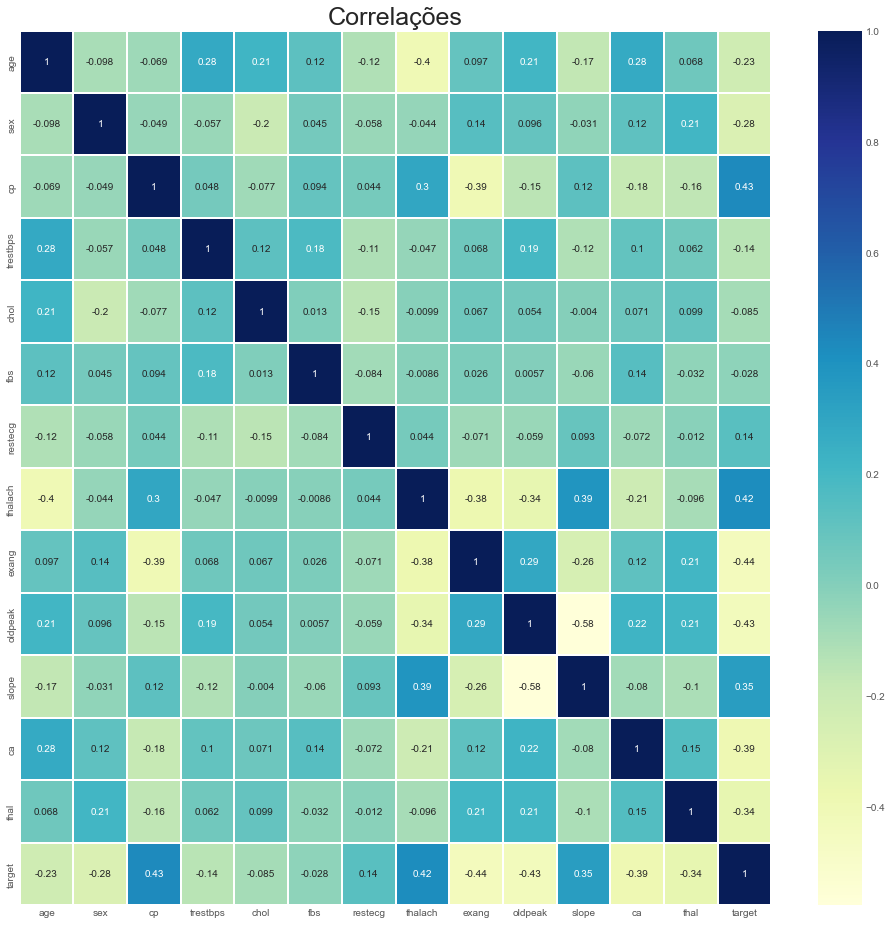

In [115]:
plt.style.use('ggplot')
plt.subplots(figsize = (15,15))
heat_map = sns.heatmap(heart_1.corr(), annot = True, cmap = 'YlGnBu', linewidths=.10)

plt.title('Correlações', fontsize = 25 )
plt.show()


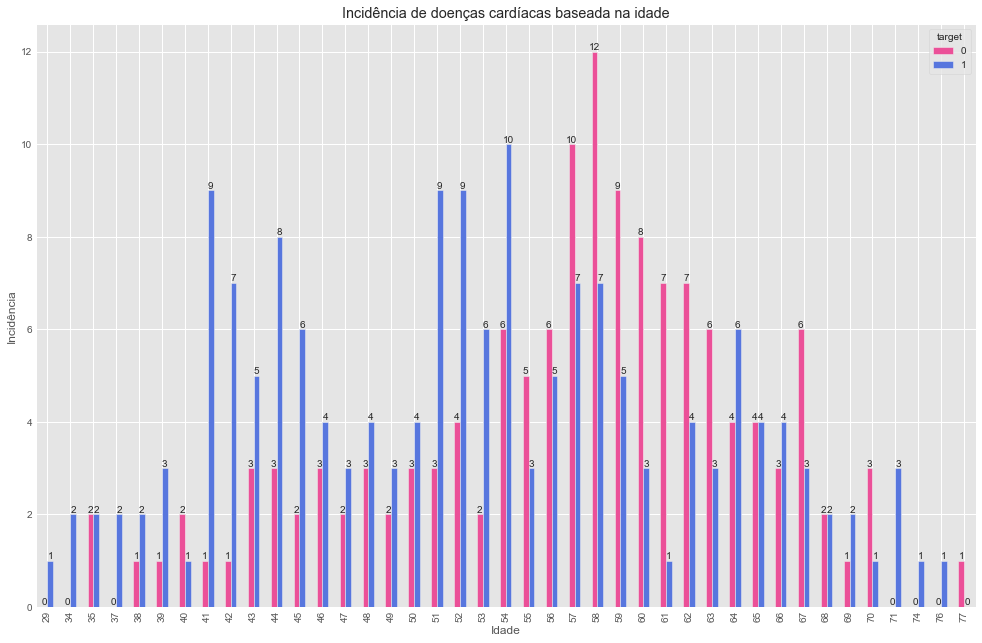

In [116]:
### Incidência de doenças cardíacas na nossa base de dados baseada na idade

ax__1 = pd.crosstab(heart['age'], heart['target']).plot(kind='bar', figsize = (15,10), color = ('#EB5098', '#5776DE'))
for x in ax__1.containers:
    ax__1.bar_label(x, label_type='edge', fontsize = 10)

plt.title('Incidência de doenças cardíacas baseada na idade')
plt.xlabel('Idade')
plt.ylabel('Incidência')
plt.show()

Text(0, 0.5, 'Incidência de Talassemia')

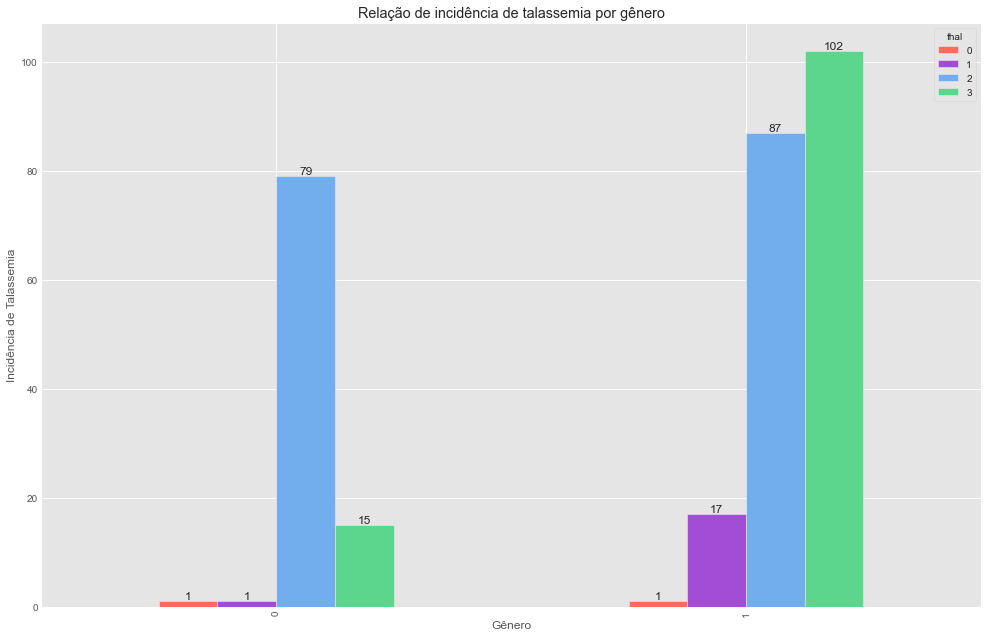

In [117]:
thal_1 = pd.crosstab(heart_1['sex'], heart_1['thal']).plot(kind='bar', figsize = (15,10), color = ('#FF6C5C', '#A14DD6','#72ADED','#5CD68D'))

for x in thal_1.containers:
    thal_1.bar_label(x, fontsize = 12 , label_type='edge')



plt.title ('Relação de incidência de talassemia por gênero')
plt.xlabel('Gênero')
plt.ylabel('Incidência de Talassemia')

Text(0, 0.5, 'Incidência')

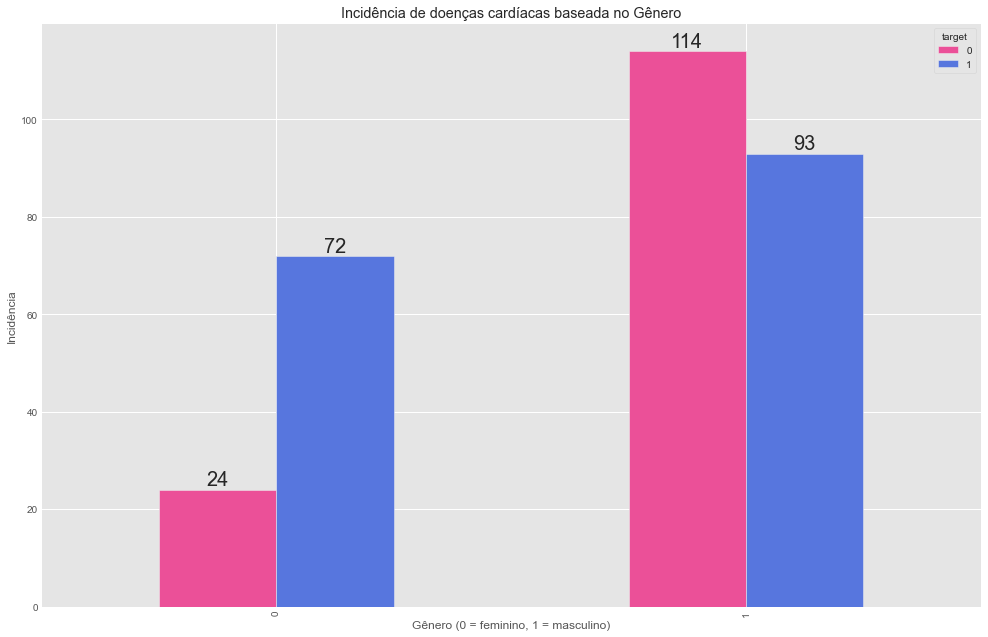

In [118]:
### Relação das incidências com o gênero

genero_e_incidencia = pd.crosstab(heart_1['sex'], heart_1['target']).plot(kind='bar', figsize = (15,10), color = ('#EB5098', '#5776DE'))

for x in genero_e_incidencia.containers:
    genero_e_incidencia.bar_label(x, label_type='edge', fontsize = 20)

plt.title('Incidência de doenças cardíacas baseada no Gênero')
plt.xlabel('Gênero (0 = feminino, 1 = masculino)')
plt.ylabel('Incidência')

<AxesSubplot:xlabel='age', ylabel='Density'>

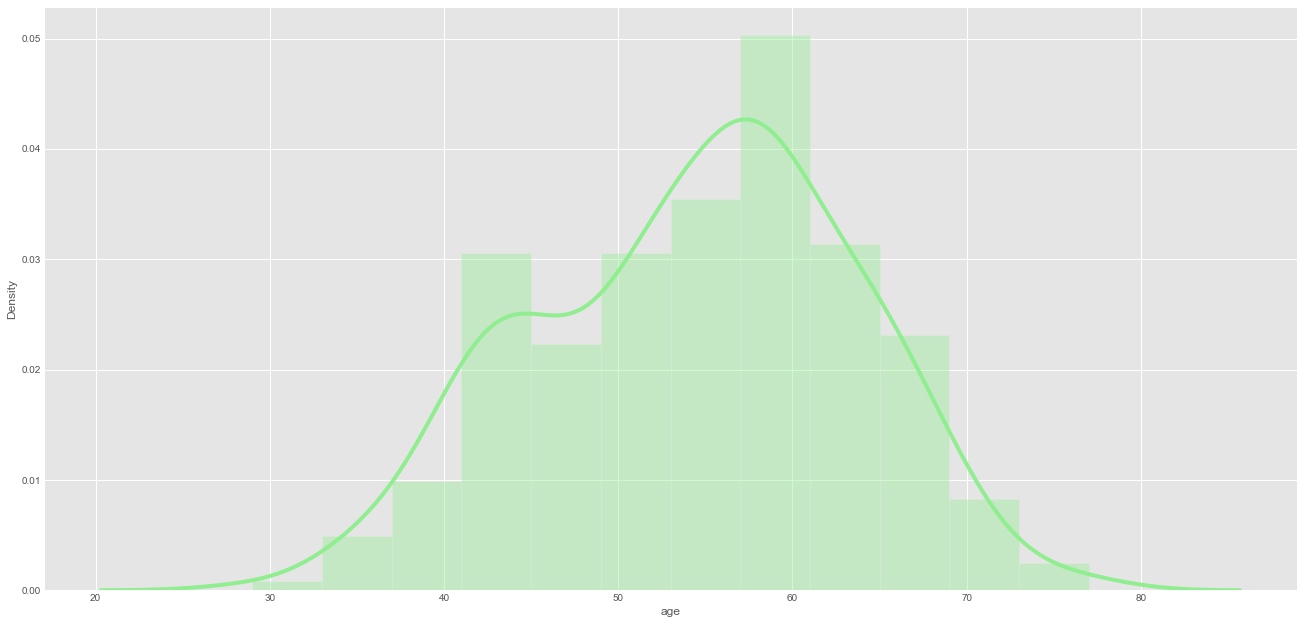

In [119]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20,10)
sns.distplot(heart_1['age'], color = 'lightgreen')

In [120]:
##GERANDO UM GRÁFICO TRIDIMENSIONAL

grafico_3d_0 = go.Scatter3d(
    x = heart['chol'],
    y = heart['trestbps'],
    z = heart['age'],
    mode = 'markers',
    marker = dict(
         size = 10,
         color = heart['age'],
         colorscale = 'YlGnBu'
    )
)

graph0 = [grafico_3d_0]

layout = go.Layout(title = 'Colesterol vs Frequência cardíaca vs Idade', margin=dict( l=0, r=0, b=0, t=0 ), scene = dict(
            xaxis = dict(title  = 'Colesterol'),
            yaxis = dict(title  = 'Frequência'),
            zaxis = dict(title  = 'Idade')
        )
    
)
fig = go.Figure(data = graph0, layout=layout)
py.iplot(fig)

In [121]:
grafico_3d_1 = go.Scatter3d(
    x = heart['chol'],
    y = heart['cp'],
    z = heart['age'],
    mode = 'markers',
    marker = dict(
         size = 10,
         color = heart['age'],
         colorscale = 'viridis'
    )
)

graph1 = [grafico_3d_1]

layout = go.Layout( title = 'Colesterol vs Dores no Peito vs Idade', scene = dict(
            xaxis = dict(title  = 'Colesterol'),
            yaxis = dict(title  = 'Dores no peito'),
            zaxis = dict(title  = 'Idade')
        ))



fig = go.Figure(data = graph1, layout=layout)
py.iplot(fig)

<Figure size 3600x3600 with 0 Axes>

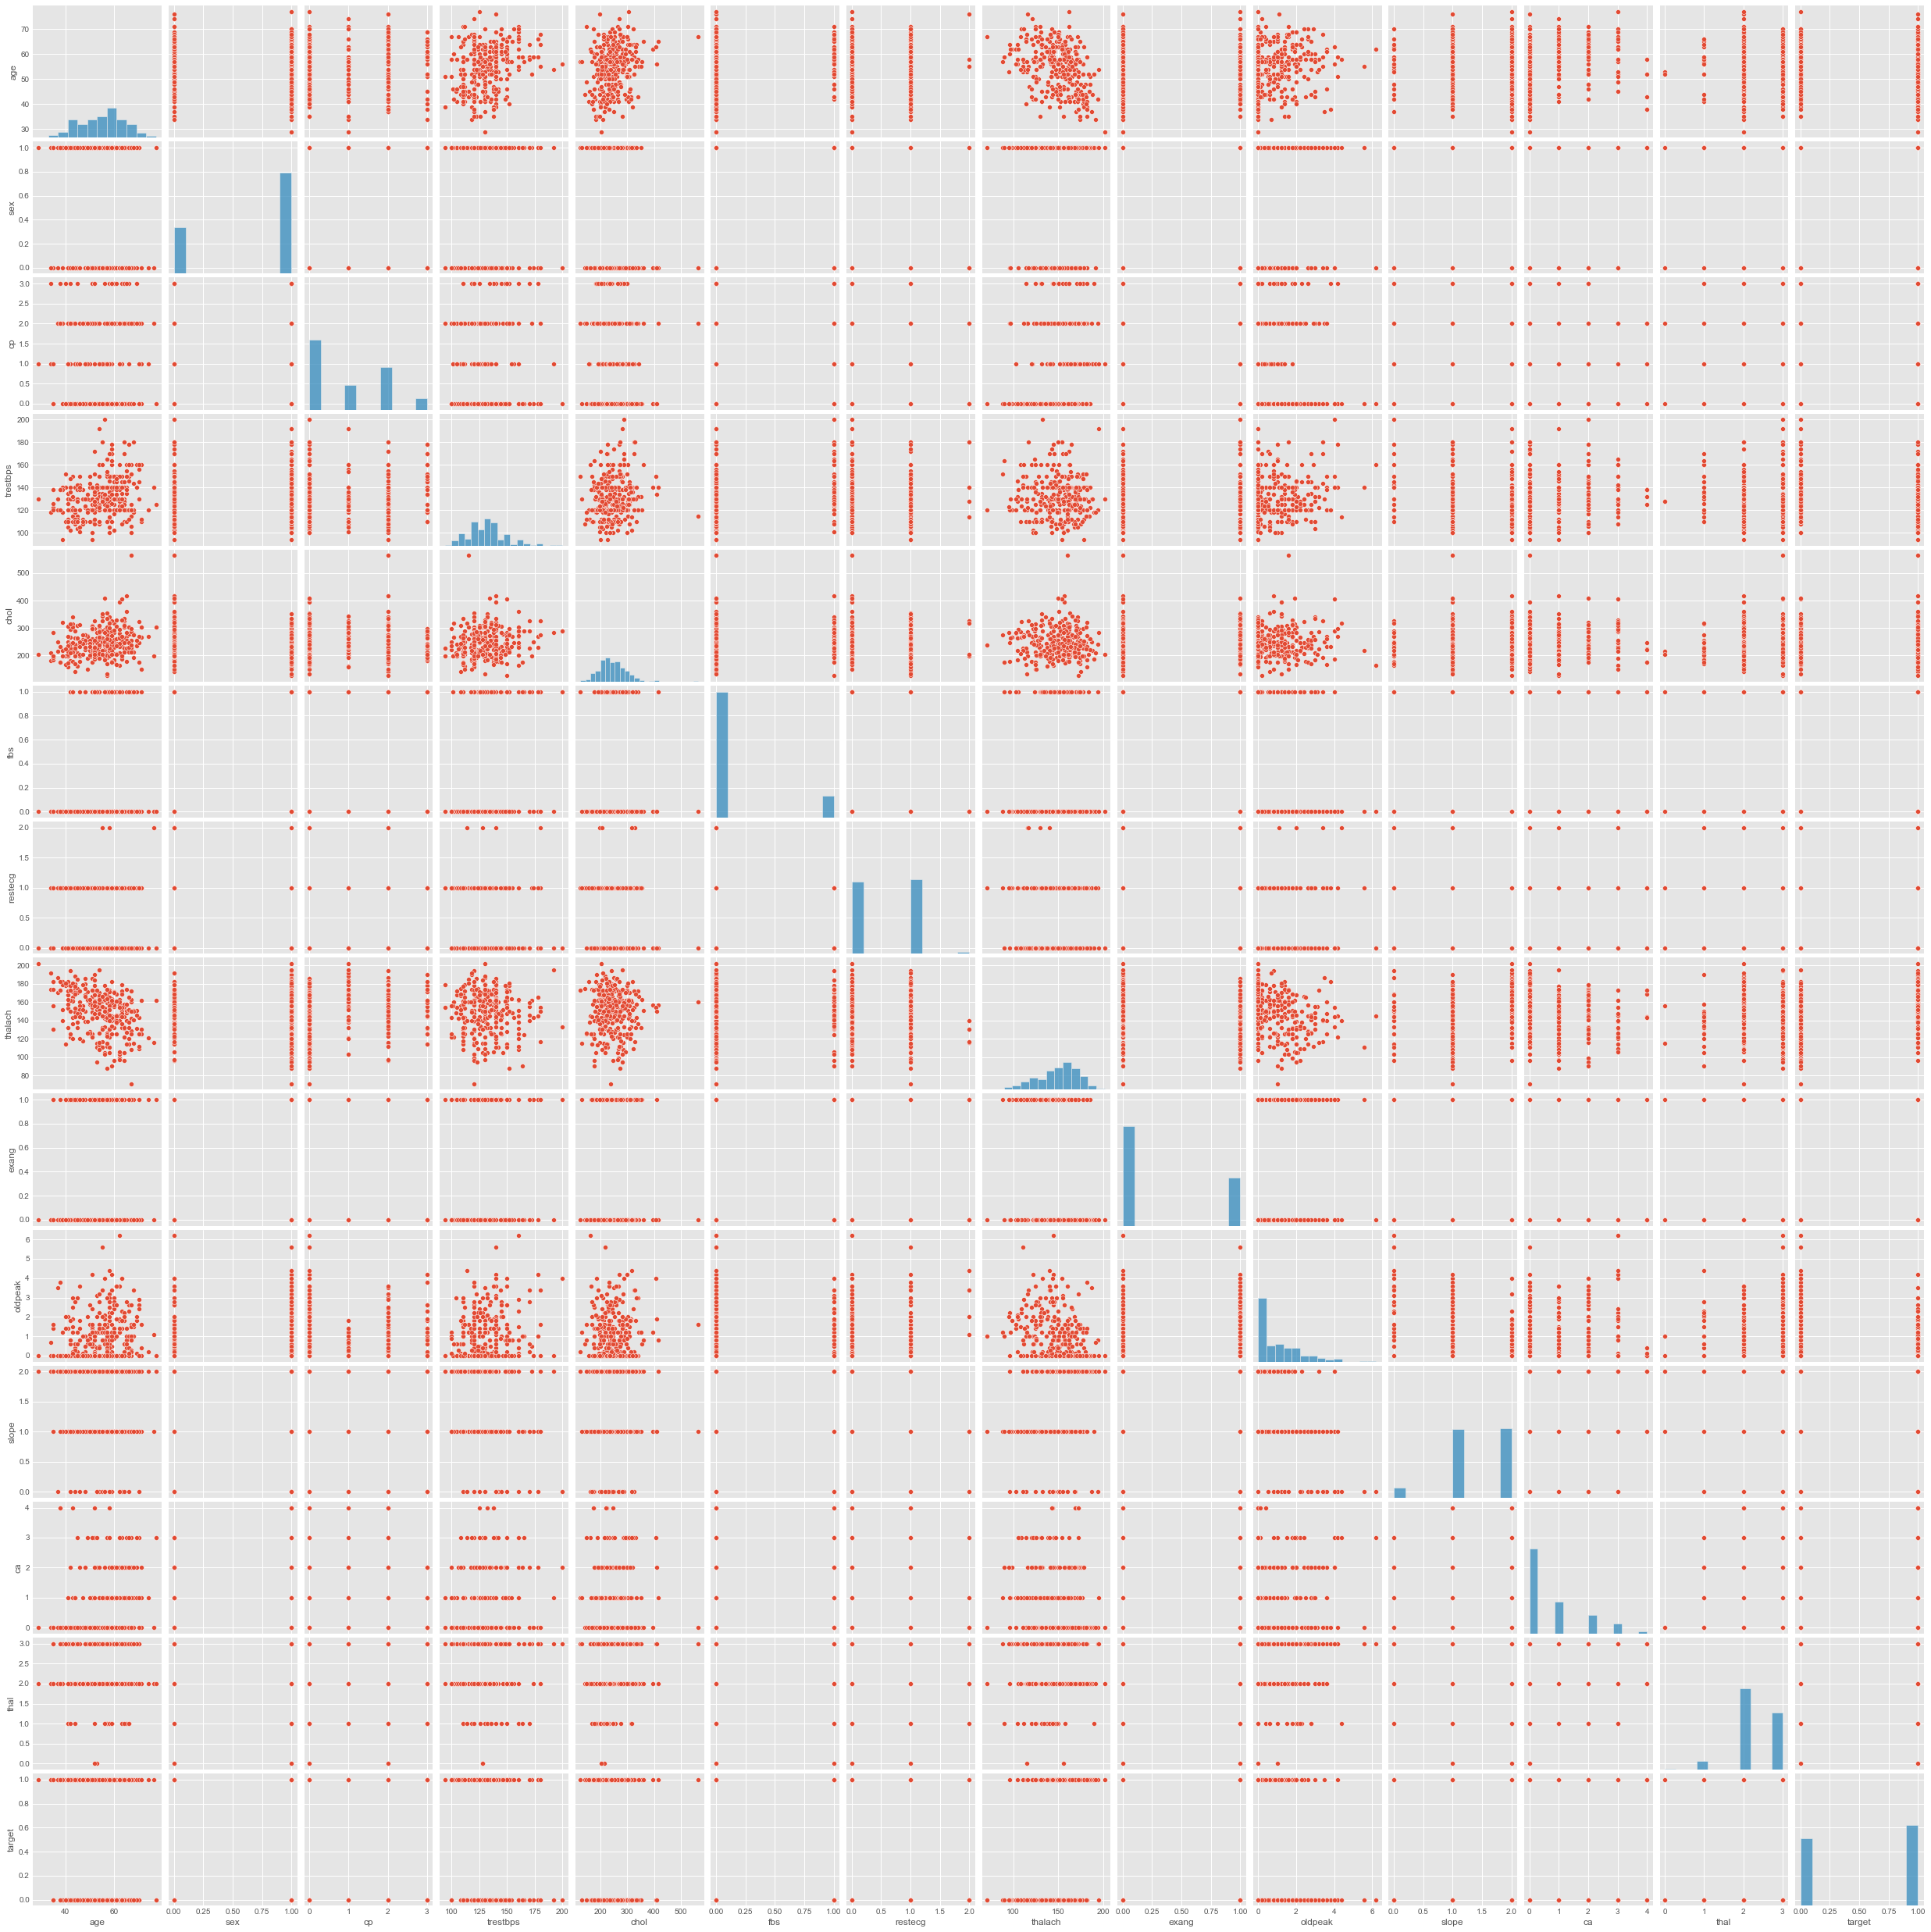

<Figure size 1440x720 with 0 Axes>

In [130]:
plt.figure(figsize=(50,50))
sns.pairplot(heart_1)

plt.show()
plt.savefig('plot_relacoes.png')

In [122]:
## Aqui vamos mudar algumas informações das variáveis
## sendo elas categóricas portanto voltaremos a usar a base de dados "heart"
## e não a heart_1


heart['sex'][heart['sex'] == 0] = 'feminino'
heart['sex'][heart['sex'] == 1] = 'masculino'


### Esse ponto do CP possui alguns erros de interpretação em relação às bases 


heart['cp'][heart['cp'] == 0] = 'Assintomático'
heart['cp'][heart['cp'] == 1] = 'Angina atípica'
heart['cp'][heart['cp'] == 2] = 'Dor não vinculada à angina'
heart['cp'][heart['cp'] == 3] = 'Angina'

heart['fbs'][heart['fbs'] == 0] = 'menor que 120mg/ml'
heart['fbs'][heart['fbs'] == 1] = 'maior que 120mg/ml'

heart['restecg'][heart['restecg'] == 0] = 'Normal'
heart['restecg'][heart['restecg'] == 1] = 'ST-T anormal'
heart['restecg'][heart['restecg'] == 2] = 'Ventrículo esquerdo hipertrofiado'

heart['exang'][heart['exang'] == 0] = 'Não'
heart['exang'][heart['exang'] == 1] = 'Sim'

heart['slope'][heart['slope'] == 0] = 'ascendente'
heart['slope'][heart['slope'] == 1] = 'normal'
heart['slope'][heart['slope'] == 2] = 'descendente'

heart['thal'][heart['thal'] == 1] = 'normal'
heart['thal'][heart['thal'] == 2] = 'corrigida/controlada'
heart['thal'][heart['thal'] == 3] = 'reversível'

In [123]:
heart.dtypes 

## Ao mudarmos as nossas variáveis categóricas, alteramos também o tipo de dado
## no caso, as que antes eram int, se tornaram object.

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca            int64
thal         object
target        int64
dtype: object

In [124]:
heart = pd.get_dummies(heart, drop_first=True)
heart.head()

### Aqui criamos colunas com as nossas varíaveis fictícias
### O número 1 = True e o 0 = False, no caso do gênero, o masculino permanece em 1,

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_masculino,cp_Angina atípica,cp_Assintomático,cp_Dor não vinculada à angina,fbs_menor que 120mg/ml,restecg_ST-T anormal,restecg_Ventrículo esquerdo hipertrofiado,exang_Sim,slope_descendente,slope_normal,thal_corrigida/controlada,thal_normal,thal_reversível
0,63,145,233,150,2.30,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
1,37,130,250,187,3.50,0,1,1,0,0,1,1,1,0,0,0,0,1,0,0
2,41,130,204,172,1.40,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
3,56,120,236,178,0.80,0,1,1,1,0,0,1,1,0,0,1,0,1,0,0
4,57,120,354,163,0.60,0,1,0,0,1,0,1,1,0,1,1,0,1,0,0


In [192]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

x = heart.drop('target', axis = 1)
y = heart['target']


X_treino, X_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, random_state=42) 


REGRESSÃO:

In [193]:
from sklearn.linear_model import LogisticRegression

regress_l = LogisticRegression(solver='liblinear')
regress_l.fit(X_treino, y_treino)


LogisticRegression(solver='liblinear')

In [194]:
teste_regress = accuracy_score(y_teste, regress_l.predict(X_teste))*100
treino_regress = accuracy_score(y_treino, regress_l.predict(X_treino))*100

resultado_regress = pd.DataFrame(data=[['Regressão Logística', treino_regress, teste_regress]], columns = ['Modelo', 'Precisão treinamento %', 'Precisão de testagem%'])

resultado_regress

,Modelo,Precisão treinamento %,Precisão de testagem%
0,Regressão Logística,85.12,90.16


KNN:

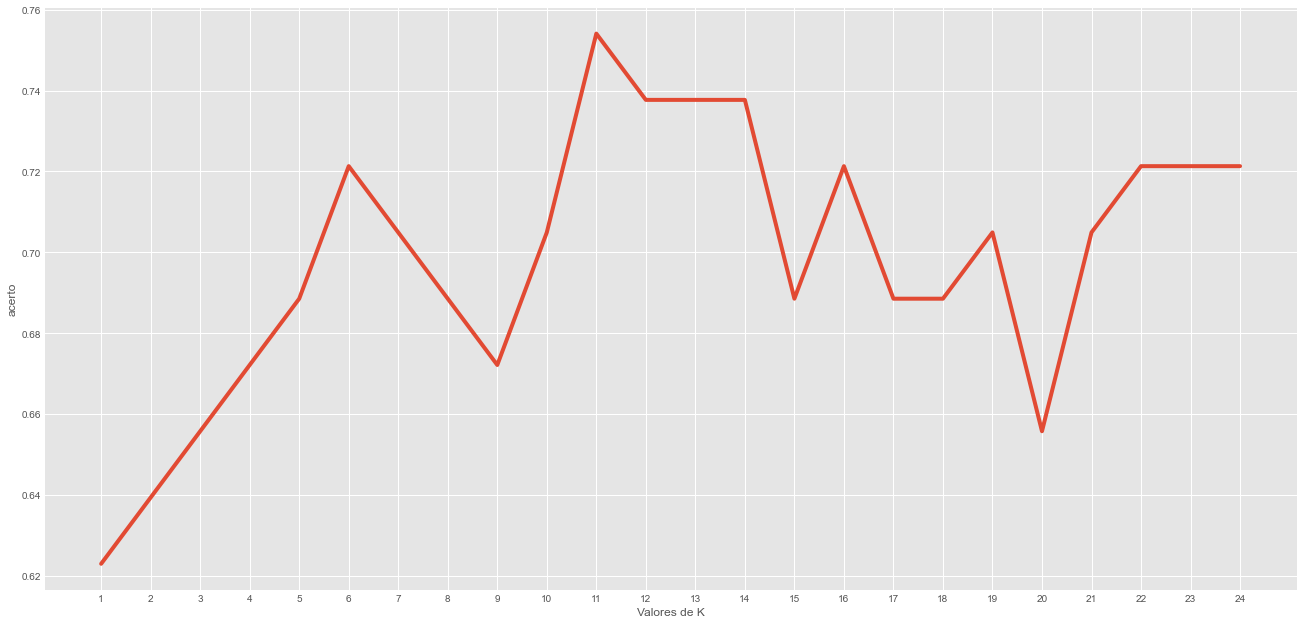

In [195]:
## KNN

from sklearn.neighbors import KNeighborsClassifier

### Vamos verificar o melhor valor de N para um resultado mais preciso

knn_ideal_lista = []
for x in range (1,25):
    knn_ideal = KNeighborsClassifier(n_neighbors= x)
    knn_ideal.fit(X_treino,y_treino)
    knn_ideal_lista.append(knn_ideal.score(X_teste,y_teste))

plt.plot(range(1,25), knn_ideal_lista)
plt.xticks(np.arange(1,25,1))
plt.xlabel("Valores de K")
plt.ylabel("acerto")
plt.show()



In [196]:
modelo_knn = KNeighborsClassifier(n_neighbors=11)
modelo_knn.fit(X_treino, y_treino)

KNeighborsClassifier(n_neighbors=11)

In [197]:
teste_knn = accuracy_score(y_teste, modelo_knn.predict(X_teste))*100
treino_knn = accuracy_score(y_treino, modelo_knn.predict(X_treino))*100

resultado_knn = pd.DataFrame(data=[['KNN', treino_knn, teste_knn]], columns = ['Modelo', 'Precisão treinamento %', 'Precisão de testagem%'])

resultado_knn


,Modelo,Precisão treinamento %,Precisão de testagem%
0,KNN,72.73,75.41


SVM:

In [201]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_treino,y_treino)

svm_teste = accuracy_score(y_teste, svm_model.predict(X_teste))*100
svm_treino = accuracy_score(y_treino, svm_model.predict(X_treino))*100

resultado_svm = pd.DataFrame(data=[['SVM', svm_treino, svm_teste]], columns = ['Modelo', 'Precisão treinamento %', 'Precisão de testagem%'])
resultado_svm

,Modelo,Precisão treinamento %,Precisão de testagem%
0,SVM,66.12,70.49


RANDOM FOREST:

In [208]:
random_forest = RandomForestClassifier(n_estimators = 50, max_depth = 5)
random_forest.fit(X_treino,y_treino)

frt_tst = accuracy_score(y_teste, random_forest.predict(X_teste))*100
frt_trn = accuracy_score(y_treino, random_forest.predict(X_treino))*100


resultado_random = pd.DataFrame(data=[['Random Forest', frt_trn, frt_tst]], columns = ['Modelo', 'Precisão treinamento %', 'Precisão de testagem%'])
resultado_random


,Modelo,Precisão treinamento %,Precisão de testagem%
0,Random Forest,92.15,86.89


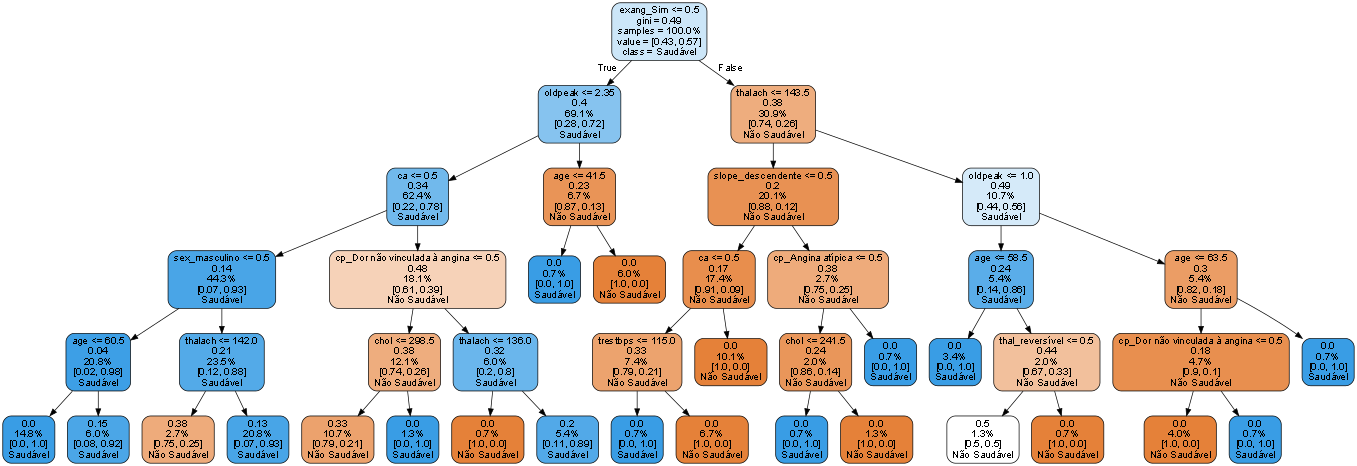

In [217]:
from sklearn.tree import export_graphviz

est_1 = random_forest.estimators_[1]   
classificacoes = [ z for z in X_treino.columns]

y_treino_str = y_treino.astype('str')
y_treino_str[y_treino_str == '0'] = 'Saudável'
y_treino_str[y_treino_str == '1'] = 'Não Saudável'
y_treino_str = y_treino_str.values


export_graphviz(est_1, out_file='tree.dot', 
                feature_names = classificacoes,
                class_names = y_treino_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=50'])

from IPython.display import Image
Image(filename = 'tree.png')